In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.datasets import fetch_openml

mushroom_data = fetch_openml(name='mushroom', version=1)

In [49]:
mushroom_data.data.shape

(8124, 22)

In [50]:
print(mushroom_data.DESCR)

**Author**: [Jeff Schlimmer](Jeffrey.Schlimmer@a.gp.cs.cmu.edu)  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/mushroom) - 1981     
**Please cite**:  The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 


### Description

This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

### Source
```
(a) Origin: 
Mushroom records are drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 

(b) Donor: 
Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)
```

### Dataset description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the

In [51]:
mushroom_data.feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises%3F',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [52]:
mushroom_data.target_names

['class']

In [53]:
mushroom_data = mushroom_data.frame

In [54]:
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [55]:
mushroom_data.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,c,l,e


In [56]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [57]:
mushroom_data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [58]:
mushroom_data.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises%3F,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


<Axes: xlabel='cap-shape', ylabel='count'>

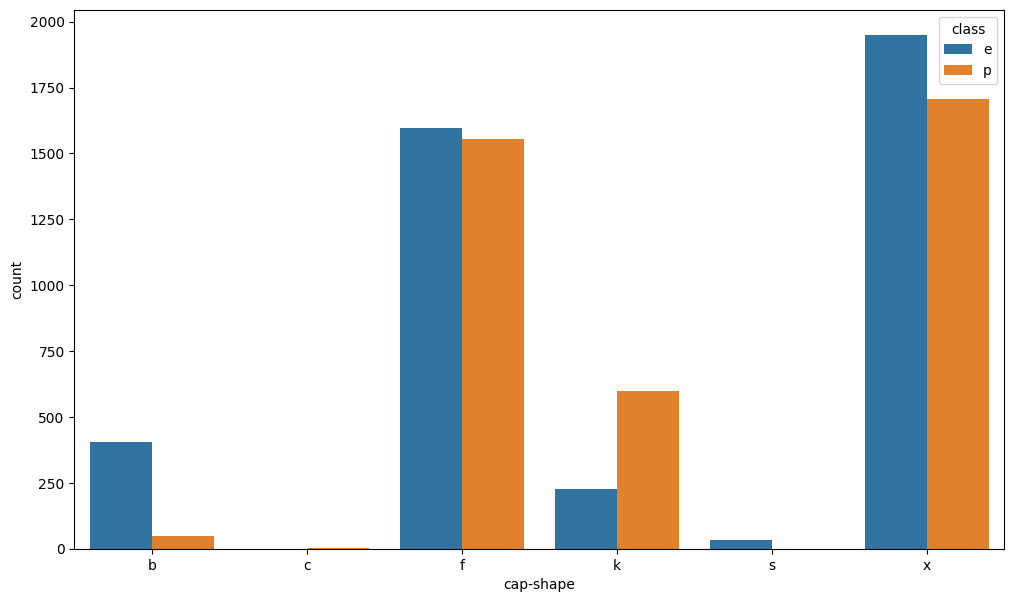

In [59]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_data, x='cap-shape', hue='class')

<Axes: xlabel='cap-color', ylabel='count'>

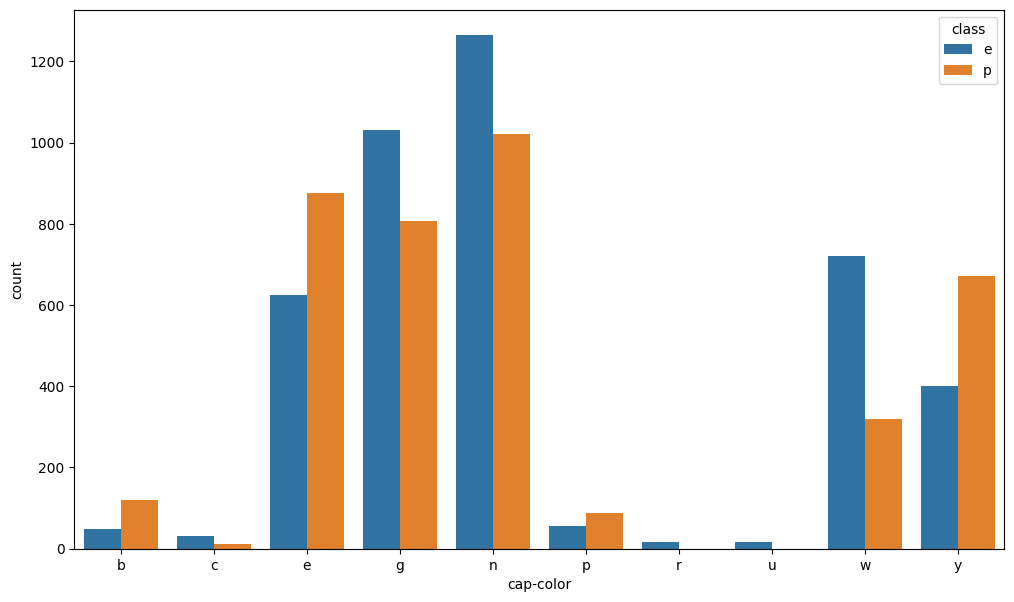

In [60]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='cap-color', hue='class')

<Axes: xlabel='population', ylabel='count'>

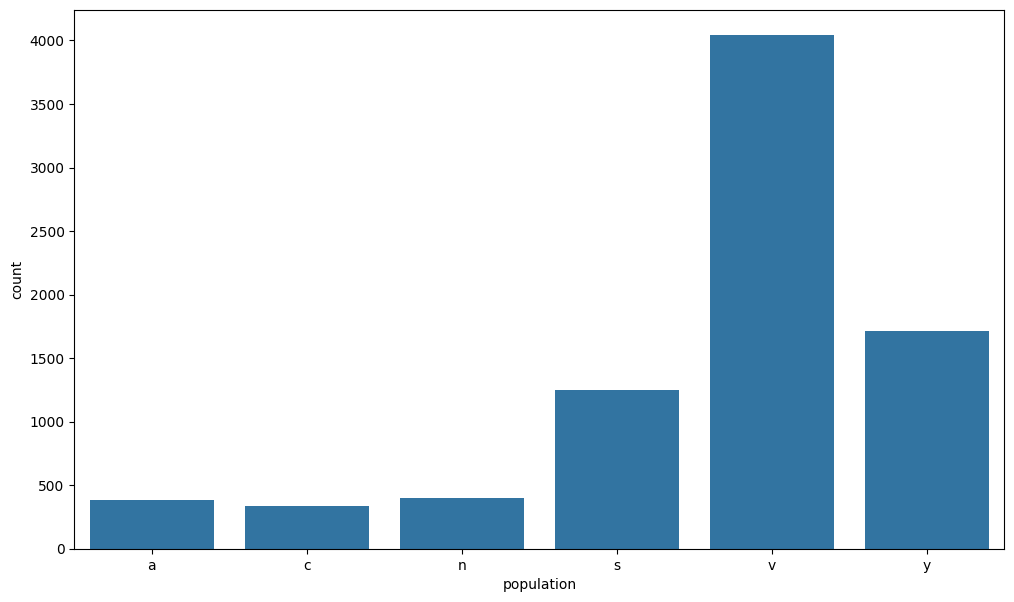

In [61]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='population')

<Axes: xlabel='habitat', ylabel='count'>

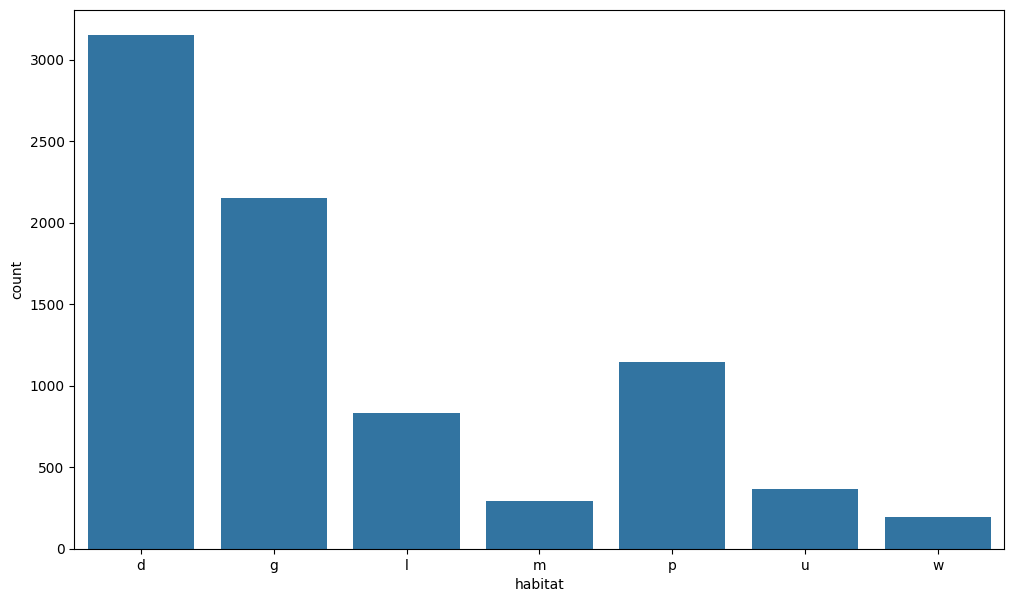

In [62]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='habitat')

<Axes: xlabel='stalk-root', ylabel='count'>

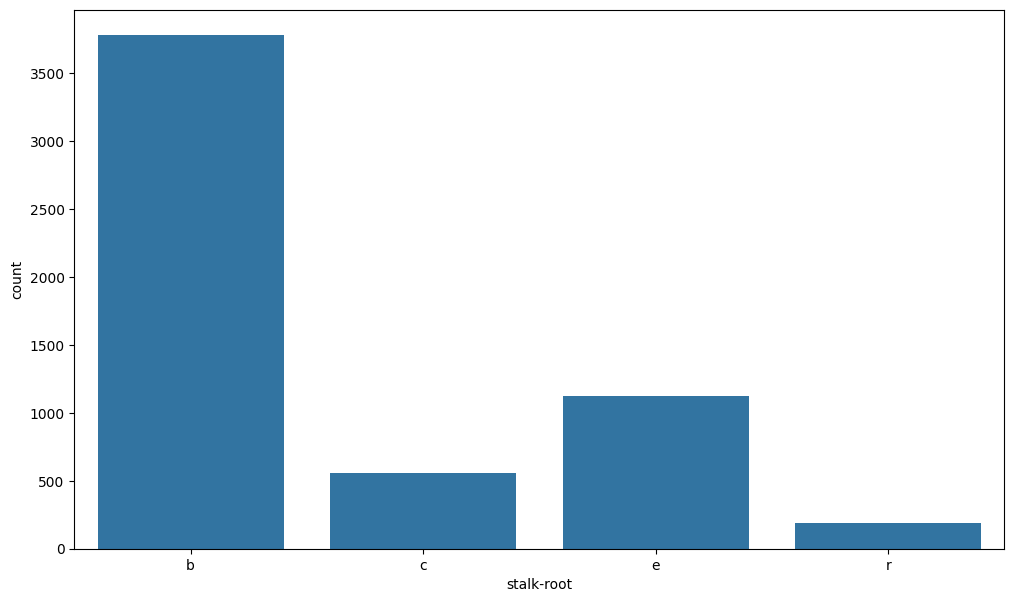

In [63]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='stalk-root')

<Axes: xlabel='class', ylabel='count'>

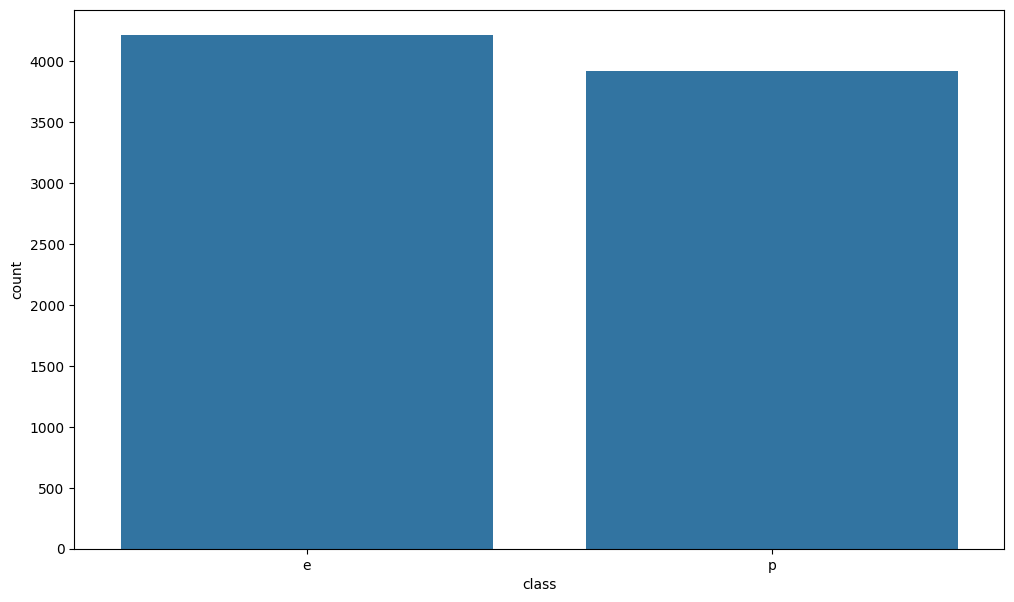

In [64]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='class')

In [65]:
mushroom_df = mushroom_data.dropna()

In [66]:
mushroom = mushroom_df.drop('class', axis=1)
mushroom_labels = mushroom_df['class']
mushroom_labels

,class
0,p
1,e
2,e
3,p
4,e
...,...
7986,e
8001,e
8038,e
8095,p


In [67]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

mushroom_prepared = encoder.fit_transform(mushroom)
mushroom_prepared

array([[5., 2., 4., ..., 1., 3., 5.],
       [5., 2., 7., ..., 2., 2., 1.],
       [0., 2., 6., ..., 2., 2., 3.],
       ...,
       [5., 3., 3., ..., 5., 5., 4.],
       [5., 3., 1., ..., 5., 1., 0.],
       [2., 3., 1., ..., 5., 1., 0.]])

In [68]:
mushroom_prep_df = pd.DataFrame(mushroom_prepared, columns=mushroom.columns)
mushroom_prep_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
1,5.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0
2,0.0,2.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0
3,5.0,3.0,6.0,1.0,6.0,1.0,0.0,1.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,2.0,1.0,...,2.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


In [69]:
from sklearn.cluster import KMeans

k_clust = KMeans(n_clusters=2, random_state=42)

k_clust.fit(mushroom_prep_df)

KMeans(n_clusters=2, random_state=42)

In [70]:
k_clust.cluster_centers_

array([[ 3.44593056e+00,  1.57797382e+00,  3.67558338e+00,
         7.25099602e-01,  4.56431417e+00,  9.94877632e-01,
         2.48150256e-01,  1.53101878e-01,  4.62692089e+00,
         7.52988048e-01,  7.34490609e-01,  1.74473534e+00,
         1.79681275e+00,  4.29624360e+00,  4.26892430e+00,
         0.00000000e+00,  2.27660785e-03,  1.01935117e+00,
         2.34120660e+00,  1.63972681e+00,  3.58252703e+00,
         9.05805350e-01],
       [ 3.37793427e+00,  1.70845070e+00,  5.25821596e+00,
         2.98591549e-01,  1.91596244e+00,  1.00000000e+00,
         7.13615023e-02,  7.79342723e-02,  1.73849765e+00,
         1.09859155e-01,  3.71361502e-01,  1.28873239e+00,
         1.32676056e+00,  3.37793427e+00,  3.37793427e+00,
         0.00000000e+00, -4.03323208e-17,  1.00751174e+00,
         1.69248826e+00,  5.15492958e-01,  3.92816901e+00,
         1.78075117e+00]])

In [71]:
k_labels = k_clust.labels_
k_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [72]:
map_dict = {

    'p':0,
    'e':1
}

mushroom_labels_prep = mushroom_labels.map(map_dict)
mushroom_labels_prep

,class
0,0
1,1
2,1
3,0
4,1
...,...
7986,1
8001,1
8038,1
8095,0


In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(mushroom_labels_prep, k_labels)

0.2074769666902906